# Color transfer by optimal transport

In [1]:
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from skimage.segmentation import mark_boundaries
from tools.image import Image
from tools.color_ot import compute_transport_map, post_processing

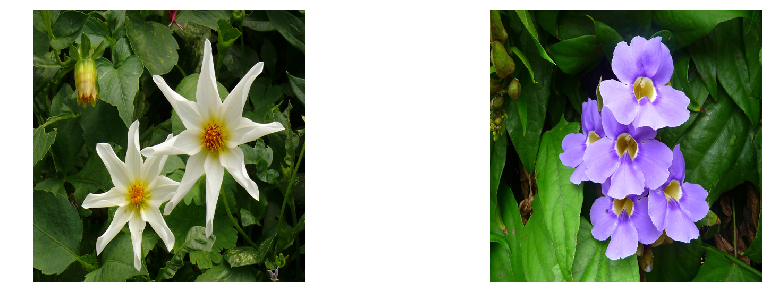

In [2]:
# image loading
u = Image('images/flower_1.jpg')
v = Image('images/flower_2.jpg')

# image display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(u.array)
ax1.axis('off')

ax2.imshow(v.array)
ax2.axis('off');

In [3]:
# quantization
num_segments = 500

u.quantize(num_segments)
v.quantize(num_segments)

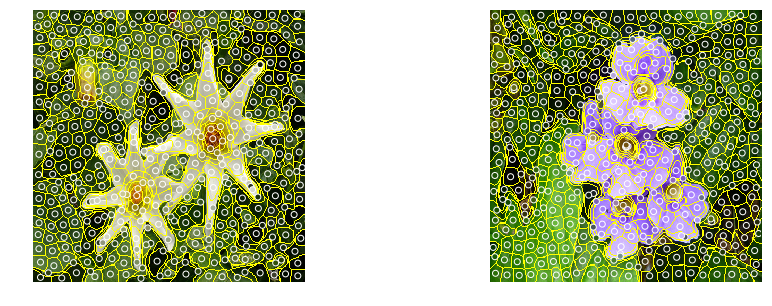

In [4]:
# clusters display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(mark_boundaries(u.array, u.segments))

ax1.scatter([u.clusters[cluster_idx]['spatial_mean'][1] * u.array.shape[1] 
             for cluster_idx in range(len(u.clusters))],
            [u.clusters[cluster_idx]['spatial_mean'][0] * u.array.shape[0] 
             for cluster_idx in range(len(u.clusters))],
            facecolor=[u.clusters[cluster_idx]['color_mean'] 
                       for cluster_idx in range(len(u.clusters))],
            edgecolor='white')

ax1.axis('off')

ax2.imshow(mark_boundaries(v.array, v.segments))

ax2.scatter([v.clusters[cluster_idx]['spatial_mean'][1] * v.array.shape[1] 
             for cluster_idx in range(len(v.clusters))],
            [v.clusters[cluster_idx]['spatial_mean'][0] * v.array.shape[0] 
             for cluster_idx in range(len(v.clusters))],
            facecolor=[v.clusters[cluster_idx]['color_mean'] 
                       for cluster_idx in range(len(v.clusters))],
            edgecolor='white')

ax2.axis("off");

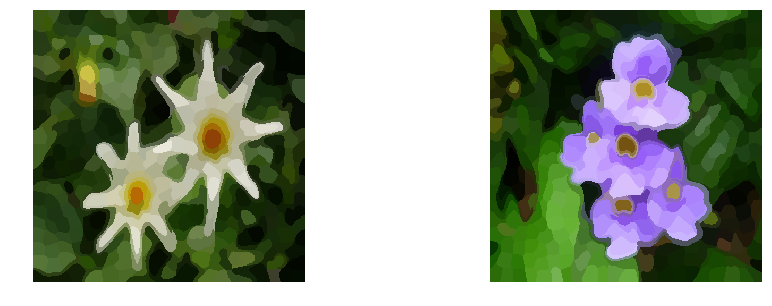

In [5]:
# quantized images display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.imshow(u.quantized_array)
ax1.axis('off')

ax2.imshow(v.quantized_array)
ax2.axis("off");

In [6]:
# hyper-parameters
num_iter = 1000
tau = 1e-4
rho = 1e1
mu = 5e-1
alpha = 5e-2
beta = 0.2
num_neighbors = 50
sigma = 0.25

In [7]:
# transport map computation
transport_map = compute_transport_map(u, v, num_iter, tau, rho, mu, alpha, beta, num_neighbors)

11.324451789464527


11.324389695150447


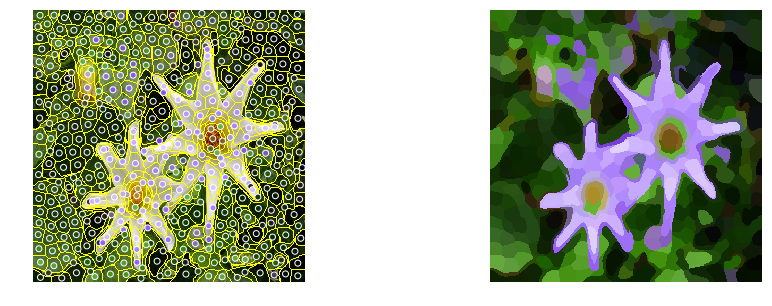

In [8]:
# color transfer result (super-pixel scale)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

x_clusters = [u.clusters[cluster_idx]['spatial_mean'][1] * u.array.shape[1] 
              for cluster_idx in range(len(u.clusters))]

y_clusters = [u.clusters[cluster_idx]['spatial_mean'][0] * u.array.shape[0] 
              for cluster_idx in range(len(u.clusters))]

col_clusters = [transport_map[cluster_idx] for cluster_idx in range(len(u.clusters))]

ax1.imshow(mark_boundaries(u.array, u.segments))
ax1.scatter(x_clusters, y_clusters, facecolor=col_clusters, edgecolor='white')
ax1.axis('off')

ax2.imshow(transport_map[u.segments])
ax2.axis('off');

In [9]:
# post processing
synthesized_image = post_processing(u, transport_map, 0.2)

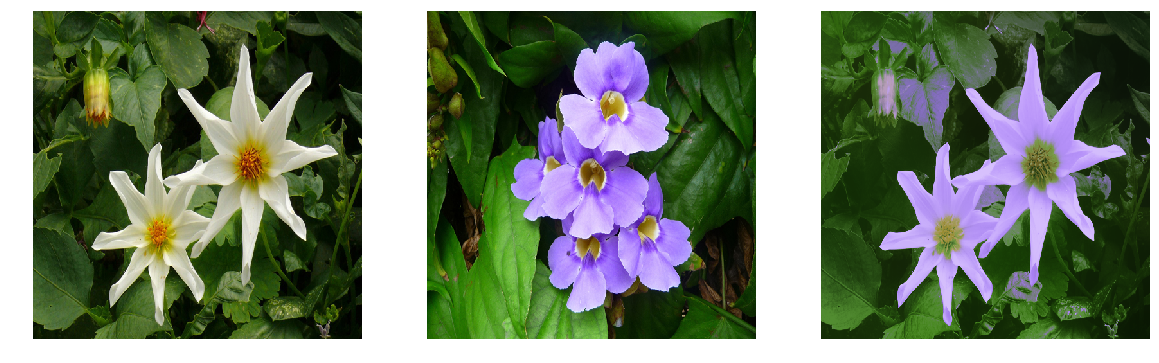

In [10]:
# color transfer result (original scale)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.imshow(u.array)
ax1.axis('off')

ax2.imshow(v.array)
ax2.axis('off')

ax3.imshow(synthesized_image)
ax3.axis('off');